# EDA For Yellow Trip Data(2020)
## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import tensorflow_data_validation
from apache_beam.io import ReadFromText
from graphviz import Source
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler



#### Data in parquet

In [2]:
march_data = pd.read_parquet("yellow_tripdata_2020-03.parquet", engine="fastparquet")
may_data = pd.read_parquet("yellow_tripdata_2020-05.parquet", engine="fastparquet")


#### Check for null and removing the NaN

In [3]:
print("March Data Missing Values:\n", march_data.isnull().sum())
print("\nMay Data Missing Values:\n", may_data.isnull().sum())

# Fill missing values with mean
march_data.fillna(march_data.mean(numeric_only=True), inplace=True)
may_data.fillna(may_data.mean(numeric_only=True), inplace=True)


March Data Missing Values:
 VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count            37808
trip_distance                  0
RatecodeID                 37808
store_and_fwd_flag         37808
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge       37808
airport_fee              3007687
dtype: int64

May Data Missing Values:
 VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count           58901
trip_distance                 0
RatecodeID                58901
store_and_fwd_flag        58901
PULocationID                  0
DOLocationID                  0
payment_type     

#### Data Types for March and May(2020)

In [4]:
data_types_march = march_data.dtypes
data_types_may = may_data.dtypes

print("March data types: ", data_types_march)
print("\n \n")
print("May data types: ", data_types_may)

March data types:  VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
dtype: object

 

May data types:  VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance             

#### Identify Outliers

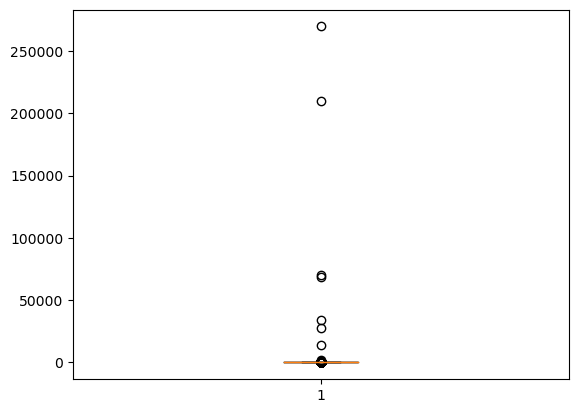

In [5]:
plt.boxplot(march_data["trip_distance"])
plt.show()

### numerical representation

In [6]:
# Assuming you have defined your categorical features somewhere in your code
categorical_features = march_data.select_dtypes(include=['object']).columns.tolist()

# Initialize LabelEncoder
le = LabelEncoder()

# Concatenate the unique values of categorical features from both March and May data
for feature in categorical_features:
    combined_labels = pd.concat([march_data[feature], may_data[feature]]).unique()
    
    # Fit LabelEncoder on combined labels
    le.fit(combined_labels)
    
    # Transform categorical features in March data
    march_data[feature] = le.transform(march_data[feature])
    
    # Transform categorical features in May data
    may_data[feature] = le.transform(may_data[feature])


### Classic EDA approach
#### Descriptive Statistics

In [7]:
print("March data:")
print(march_data.describe())

print("\nMay data:")
print(may_data.describe())

March data:
           VendorID  passenger_count  trip_distance    RatecodeID  \
count  3.007687e+06     3.007687e+06   3.007687e+06  3.007687e+06   
mean   1.671989e+00     1.467477e+00   3.117041e+00  1.051377e+00   
std    4.728856e-01     1.113025e+00   2.069207e+02  7.064390e-01   
min    1.000000e+00     0.000000e+00   0.000000e+00  1.000000e+00   
25%    1.000000e+00     1.000000e+00   1.000000e+00  1.000000e+00   
50%    2.000000e+00     1.000000e+00   1.670000e+00  1.000000e+00   
75%    2.000000e+00     1.467477e+00   3.020000e+00  1.000000e+00   
max    6.000000e+00     9.000000e+00   2.698037e+05  9.900000e+01   

       store_and_fwd_flag  PULocationID  DOLocationID  payment_type  \
count        3.007687e+06  3.007687e+06  3.007687e+06  3.007687e+06   
mean         3.444408e-02  1.634298e+02  1.609336e+02  1.251811e+00   
std          2.416581e-01  6.658654e+01  7.074132e+01  4.941198e-01   
min          0.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00   
25%        

### Visualizations
#### Histograms

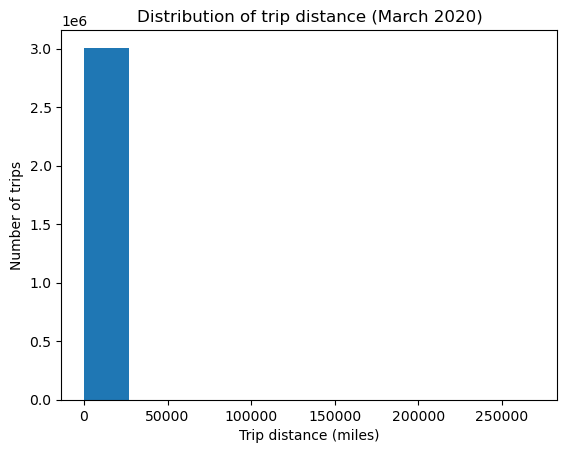

In [8]:
plt.hist(march_data["trip_distance"])
plt.xlabel("Trip distance (miles)")
plt.ylabel("Number of trips")
plt.title("Distribution of trip distance (March 2020)")
plt.show()

#### Boxplot

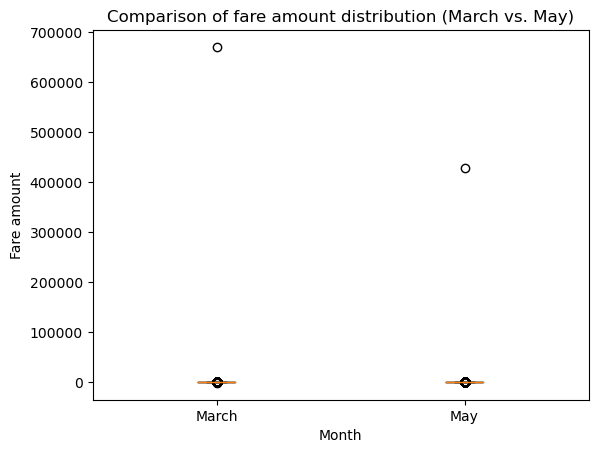

In [9]:
plt.boxplot([march_data["fare_amount"], may_data["fare_amount"]], labels=["March", "May"])
plt.xlabel("Month")
plt.ylabel("Fare amount")
plt.title("Comparison of fare amount distribution (March vs. May)")
plt.show()

### Scatter plots

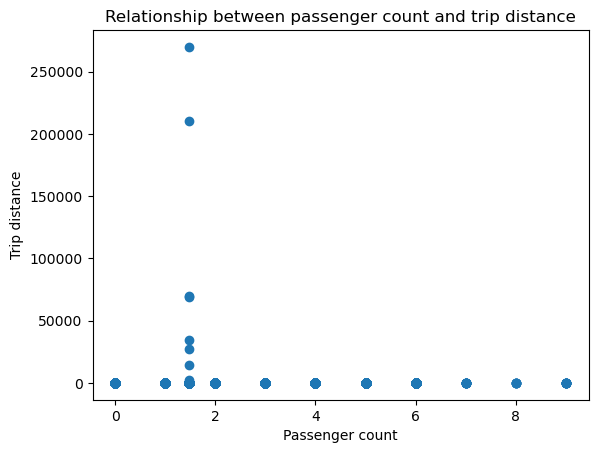

In [10]:
plt.scatter(march_data["passenger_count"], march_data["trip_distance"])
plt.xlabel("Passenger count")
plt.ylabel("Trip distance")
plt.title("Relationship between passenger count and trip distance")
plt.show()

### Correlation Analysis

In [11]:
numeric_columns = march_data.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr(method='spearman')


In [12]:

march_numeric_cols = march_data.select_dtypes(include=np.number).columns.tolist()
march_categorical_cols = march_data.select_dtypes(include='object').columns.tolist()
print("March Numeric columns:", march_numeric_cols)
print("March Categorical columns:", march_categorical_cols)

may_numeric_cols = may_data.select_dtypes(include=np.number).columns.tolist()
may_categorical_cols = may_data.select_dtypes(include='object').columns.tolist()
print("May Numeric columns:", may_numeric_cols)
print("May Categorical columns:", may_categorical_cols)


March Numeric columns: ['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']
March Categorical columns: []
May Numeric columns: ['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']
May Categorical columns: []


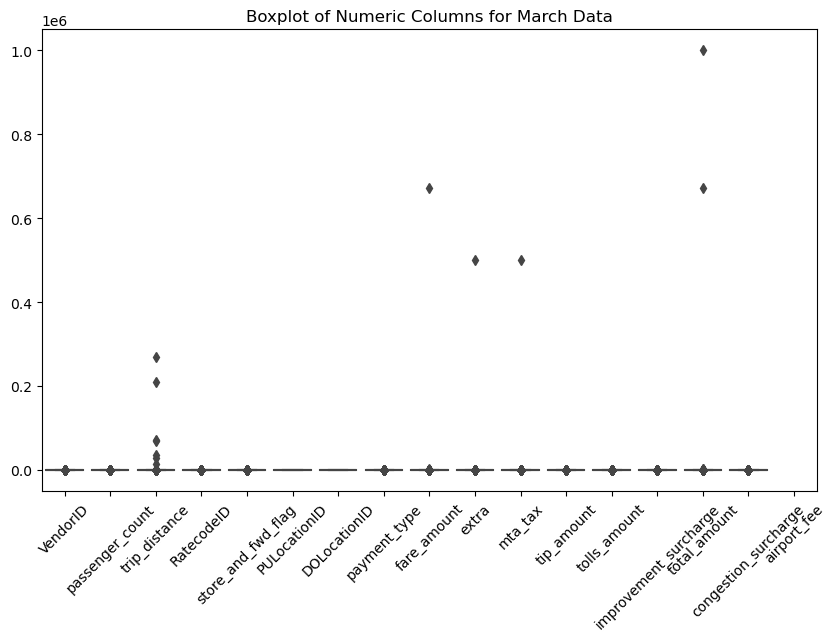

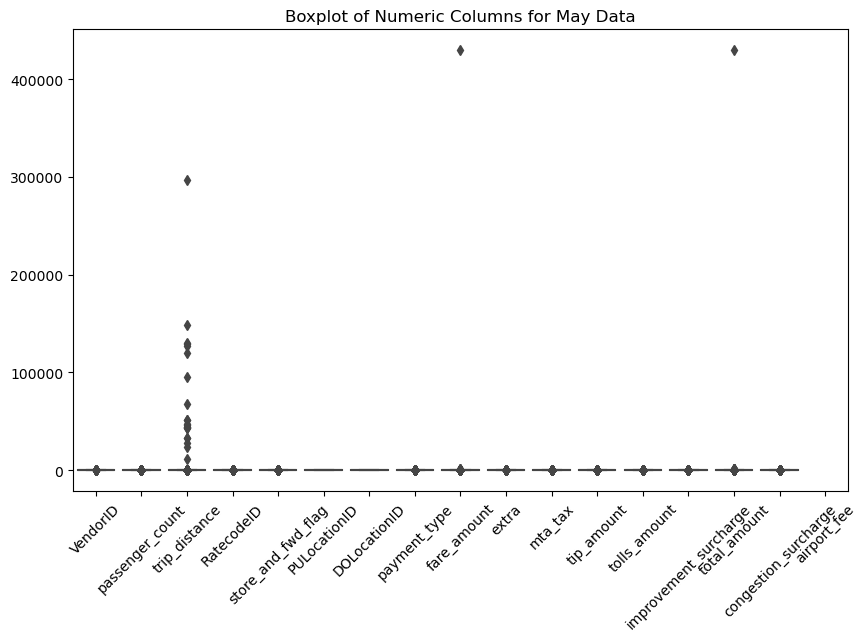

In [13]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(data=march_data[march_numeric_cols])
plt.xticks(rotation=45)
plt.title("Boxplot of Numeric Columns for March Data")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=may_data[may_numeric_cols])
plt.xticks(rotation=45)
plt.title("Boxplot of Numeric Columns for May Data")
plt.show()

## Visualizations


#### Heatmap


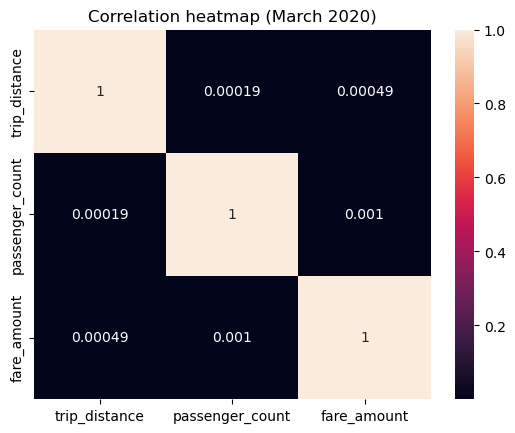

In [14]:
# correlation matrix
corr_matrix = march_data[["trip_distance", "passenger_count", "fare_amount"]].corr()

#seaborn installation
import seaborn as sns 
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation heatmap (March 2020)")
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_24232\3742020759.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = march_data.corr(method='spearman')  # Consider using Spearman's rank correlation for non-normal data


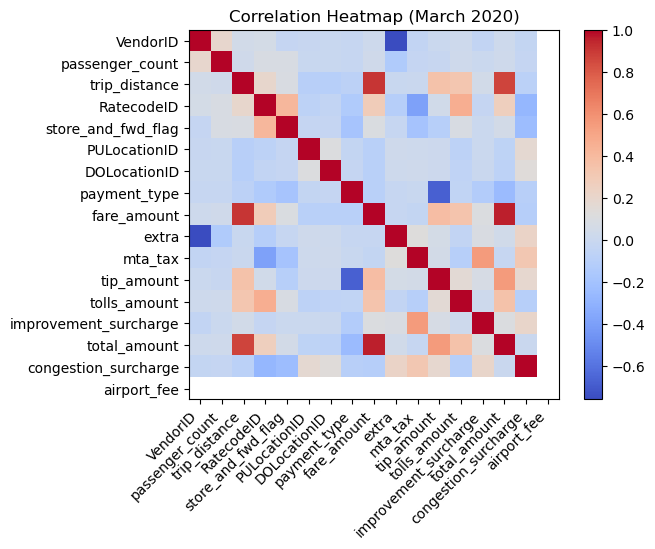

In [15]:
# Calculate correlation matrix (consider excluding categorical features)
correlation_matrix = march_data.corr(method='spearman')  # Consider using Spearman's rank correlation for non-normal data

# Create a heatmap to visualize correlations
plt.imshow(correlation_matrix, cmap='coolwarm')
plt.colorbar()

# Label ticks with feature names
tick_labels = correlation_matrix.columns
plt.xticks(range(len(tick_labels)), tick_labels, rotation=45, ha='right')
plt.yticks(range(len(tick_labels)), tick_labels)

# Set title and show the heatmap
plt.title("Correlation Heatmap (March 2020)")
plt.show()

#### Distribution for numeric features

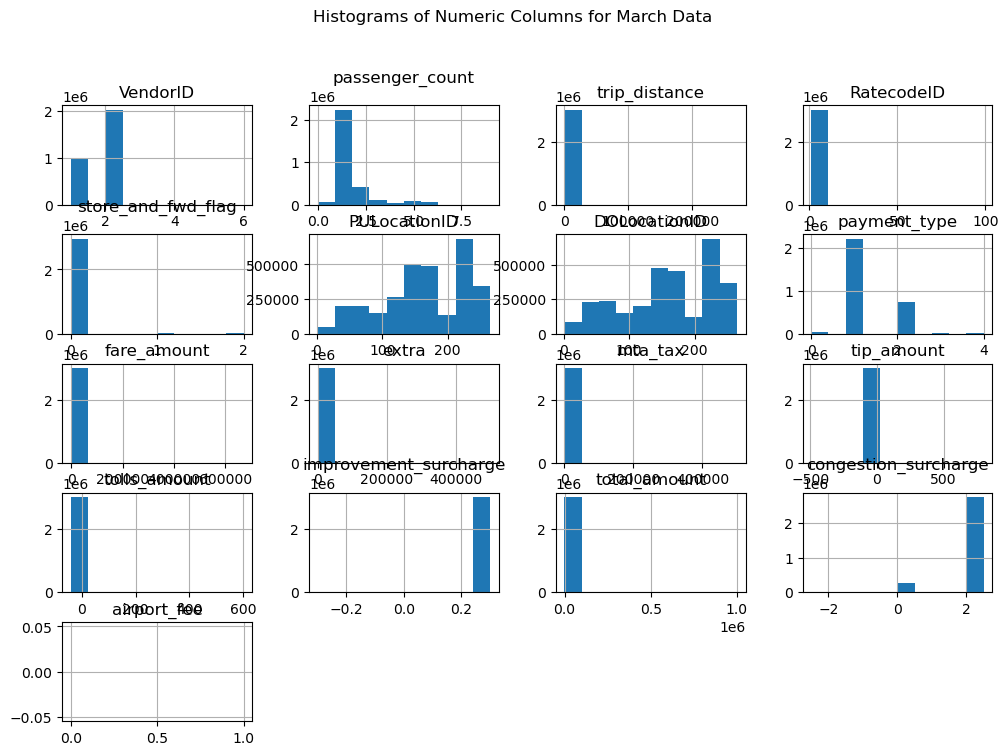

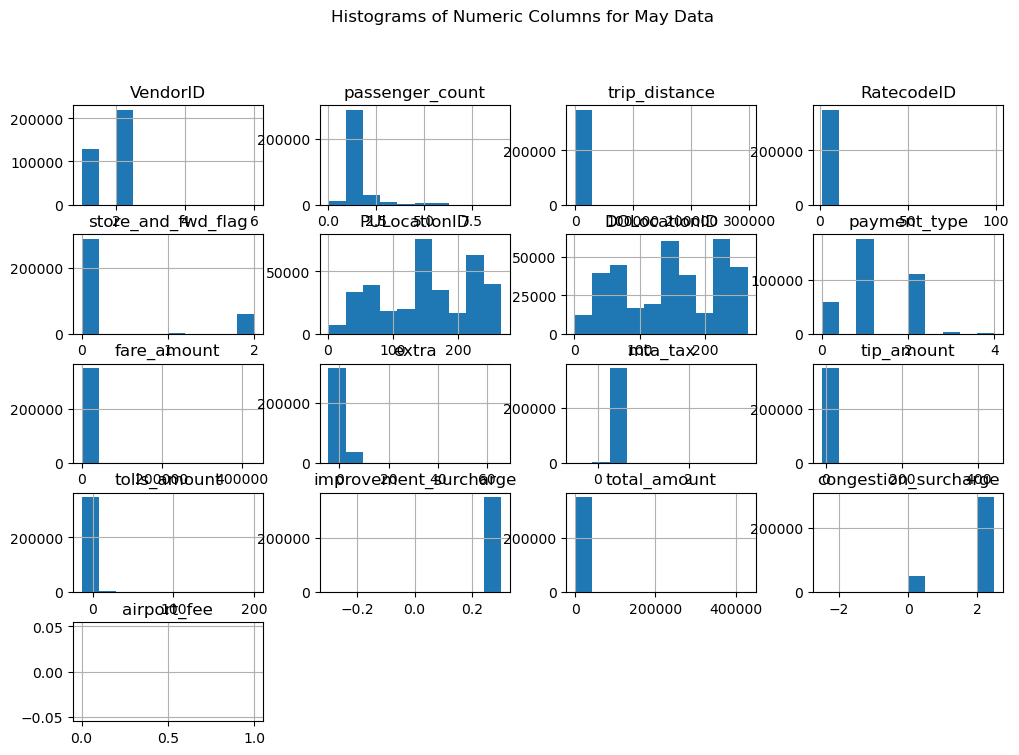

In [16]:
march_data[march_numeric_cols].hist(figsize=(12, 8))
plt.suptitle("Histograms of Numeric Columns for March Data", y=1)
plt.show()

may_data[may_numeric_cols].hist(figsize=(12, 8))
plt.suptitle("Histograms of Numeric Columns for May Data", y=1)
plt.show()


#### categorical features

In [17]:
for col in march_categorical_cols:
    print("March - Value counts for", col)
    print(march_data[col].value_counts())

for col in may_categorical_cols:
    print("May - Value counts for", col)
    print(may_data[col].value_counts())

### Tensorflow Data Validation

### Dataframe to Tensorflow dataset

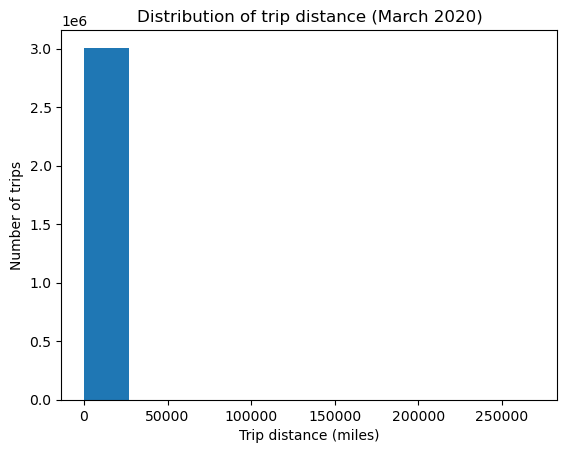

In [18]:
import matplotlib.pyplot as plt

# Assuming you have read your data
march_data = pd.read_parquet("yellow_tripdata_2020-03.parquet", engine="fastparquet")

plt.hist(march_data["trip_distance"])
plt.xlabel("Trip distance (miles)")
plt.ylabel("Number of trips")
plt.title("Distribution of trip distance (March 2020)")
plt.show()

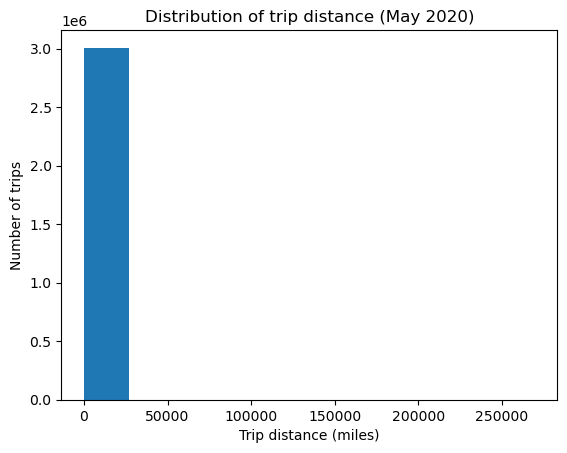

In [19]:
may_data = pd.read_parquet("yellow_tripdata_2020-03.parquet", engine="fastparquet")

plt.hist(may_data["trip_distance"])
plt.xlabel("Trip distance (miles)")
plt.ylabel("Number of trips")
plt.title("Distribution of trip distance (May 2020)")
plt.show()

### January to March comparison

In [20]:
jan_data = pd.read_parquet("yellow_tripdata_2020-01.parquet", engine="fastparquet")
feb_data = pd.read_parquet("yellow_tripdata_2020-02.parquet", engine="fastparquet")
march_data = pd.read_parquet("yellow_tripdata_2020-03.parquet", engine="fastparquet")




In [21]:
march_data.fillna(march_data.mean(numeric_only=True), inplace=True)
jan_data.fillna(jan_data.mean(numeric_only=True), inplace=True)
feb_data.fillna(feb_data.mean(numeric_only=True), inplace=True)


In [22]:
combined_data = pd.concat([jan_data, feb_data, march_data], ignore_index=True)



Combined data:
           VendorID  passenger_count  trip_distance    RatecodeID  \
count  1.571206e+07     1.571206e+07   1.571206e+07  1.571206e+07   
mean   1.673055e+00     1.501827e+00   2.939412e+00  1.056658e+00   
std    4.698929e-01     1.137466e+00   1.080070e+02  7.756546e-01   
min    1.000000e+00     0.000000e+00  -3.062000e+01  1.000000e+00   
25%    1.000000e+00     1.000000e+00   9.700000e-01  1.000000e+00   
50%    2.000000e+00     1.000000e+00   1.600000e+00  1.000000e+00   
75%    2.000000e+00     2.000000e+00   2.930000e+00  1.000000e+00   
max    6.000000e+00     9.000000e+00   2.698037e+05  9.900000e+01   

       PULocationID  DOLocationID  payment_type   fare_amount         extra  \
count  1.571206e+07  1.571206e+07  1.571206e+07  1.571206e+07  1.571206e+07   
mean   1.644307e+02  1.622801e+02  1.252675e+00  1.266000e+01  1.137880e+00   
std    6.574500e+01  7.001988e+01  4.859751e-01  1.697216e+02  1.261463e+02   
min    1.000000e+00  1.000000e+00  0.000000e+0

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


Comparison of descriptive statistics (January, February, March):


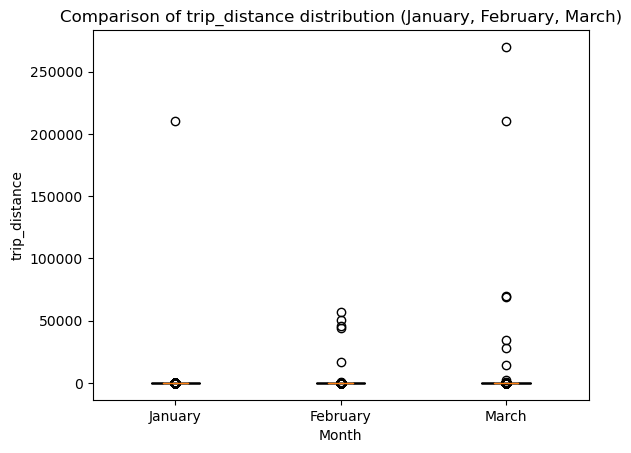

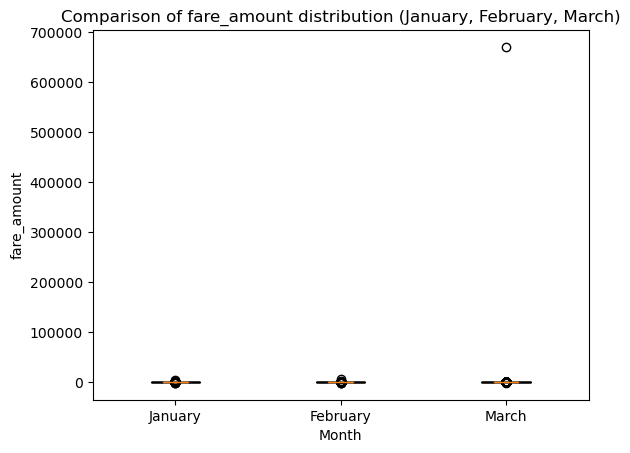

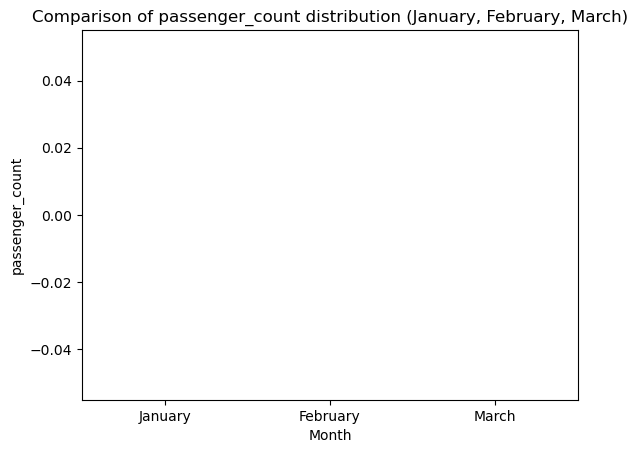

C:\Users\USER\AppData\Local\Temp\ipykernel_24232\260518429.py:61: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = combined_data.corr(method='spearman')


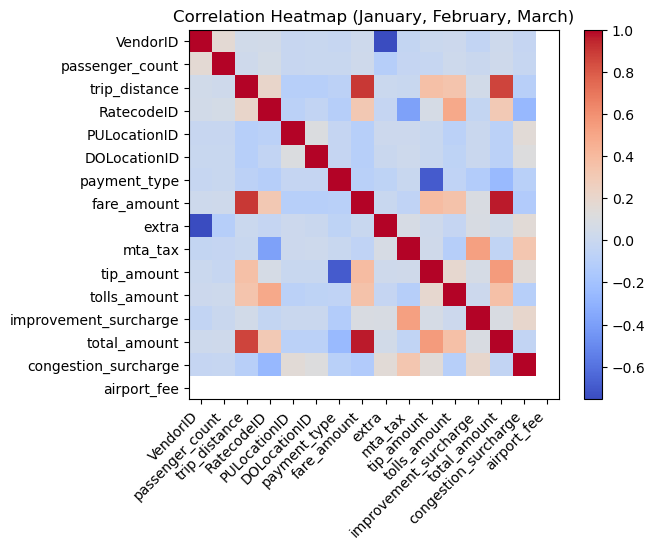

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

def compare_taxi_data(january_data_path, february_data_path, march_data_path):

    january_data = pd.read_parquet(january_data_path, engine="fastparquet")
    february_data = pd.read_parquet(february_data_path, engine="fastparquet")
    march_data = pd.read_parquet(march_data_path, engine="fastparquet")

    combined_data = pd.concat([january_data, february_data, march_data], ignore_index=True)

    combined_data.fillna(combined_data.mean(numeric_only=True), inplace=True)

    if 'date' in combined_data.columns:
        combined_data['month'] = pd.to_datetime(combined_data['date']).dt.month_name()
    else:
        print("Warning: 'date' column not found. Analysis will proceed without month information.")

    # handle outliers
    print("\nCombined data:")
    print(combined_data.describe())
    
    # Data Transformation
    categorical_features = ['VendorID', 'PULocationID', 'DOLocationID', 'payment_type']
    le = LabelEncoder()
    for feature in categorical_features:
        combined_data[feature] = le.fit_transform(combined_data[feature])

    numerical_features = ['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']
    scaler = StandardScaler()
    combined_data[numerical_features] = scaler.fit_transform(combined_data[numerical_features])

    # Descriptive statistics comparison
    print("Comparison of descriptive statistics (January, February, March):")
    try:
        print(combined_data.groupby('month').describe())
    except KeyError:
        print("Warning: 'month' column not found in data. Descriptive statistics by month cannot be calculated.")


    # Visualizations
    features_to_plot = ["trip_distance", "fare_amount", "passenger_count"]

    # Boxplots
    features_to_compare = ["trip_distance", "fare_amount", "passenger_count"]
    for feature in features_to_compare:
        plt.boxplot(
            [january_data[feature], february_data[feature], march_data[feature]],
            labels=["January", "February", "March"],
            notch=True,
            patch_artist=True
        )
        plt.xlabel("Month")
        plt.ylabel(feature)
        plt.title(f"Comparison of {feature} distribution (January, February, March)")
        plt.show()

    # Heatmap
    correlation_matrix = combined_data.corr(method='spearman')
    plt.imshow(correlation_matrix, cmap='coolwarm')
    plt.colorbar()
    tick_labels = correlation_matrix.columns
    plt.xticks(range(len(tick_labels)), tick_labels, rotation=45, ha='right')
    plt.yticks(range(len(tick_labels)), tick_labels)
    plt.title("Correlation Heatmap (January, February, March)")
    plt.show()

jan_data_path = "yellow_tripdata_2020-01.parquet"
feb_data_path = "yellow_tripdata_2020-02.parquet"
mar_data_path = "yellow_tripdata_2020-03.parquet"
compare_taxi_data(jan_data_path, feb_data_path, mar_data_path)

